# Домашее задание 2

- Загрузите изображение и переведите его в цветовое пространство HSV

- Настройте цветовой фильтр на баскетбольное кольцо так, чтобы маска была зашумлена. Пусть в ней будут отдельные белые пиксели и даже целые области, не соответствующие кольцу. Удалите этот шум с помощью морфологических операций, выводя все промежуточные этапы на экран

- Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку *cv_hw* в своем репозитории.

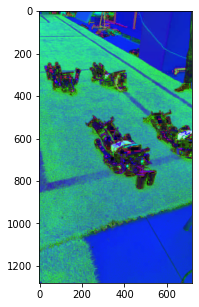

In [574]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ax=6
ay=5
kernel = np.ones((3,3),np.uint8)

canvas = cv2.imread('/content/sahrs_on_the_field.jpg')
 #Преобразуем в HSV
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(ax, ay))
plt.imshow(img)
plt.show()


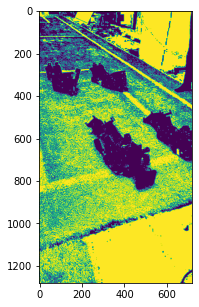

In [575]:

im1 = cv2.inRange(img, (10, 20, 100), (100, 200, 255))

plt.figure(figsize=(ax, ay))
plt.imshow(im1)#, cmap="gray")
plt.show()

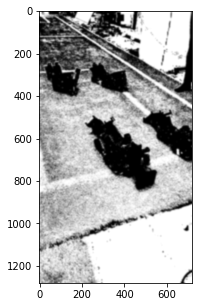

In [576]:
blur = cv2.GaussianBlur(im1, (45,45), 3)
plt.figure(figsize=(ax, ay))
plt.imshow(blur, cmap="gray")
plt.show()


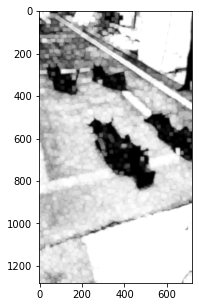

In [581]:
dilation = cv2.dilate(blur,kernel,iterations =5)
plt.figure(figsize=(ax, ay))
plt.imshow(dilation, cmap="gray")
plt.show()

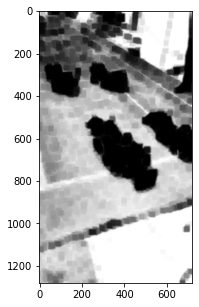

In [583]:
erosion = cv2.erode( dilation,kernel,iterations = 10)
plt.figure(figsize=(ax, ay))
plt.imshow(erosion, cmap="gray")
plt.show()

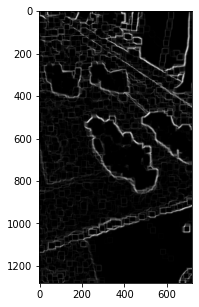

In [584]:
gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(ax, ay))
plt.imshow(gradient, cmap="gray")
plt.show()

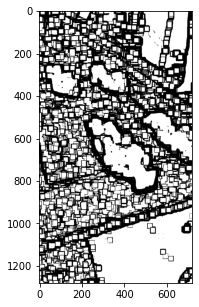

In [586]:
thresh = cv2.threshold(gradient, 1, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

503
1130


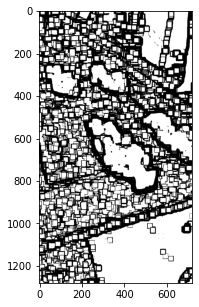

In [587]:
mainContour = max(contours, key = cv2.contourArea)
M = cv2.moments(mainContour)
if M['m00'] != 0:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(cx)
    print(cy)

plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

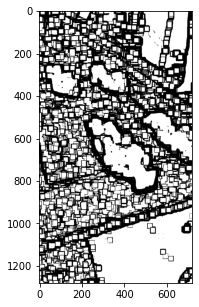

In [588]:
im= cv2.fillPoly(thresh, contours, 255)
plt.figure(figsize=(ax, ay))
plt.imshow(im, cmap="gray")
plt.show()

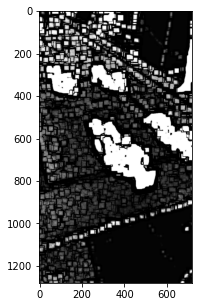

In [589]:
image9=cv2.subtract(im,blur)
plt.figure(figsize=(ax, ay))
plt.imshow(image9, cmap="gray")
plt.show()

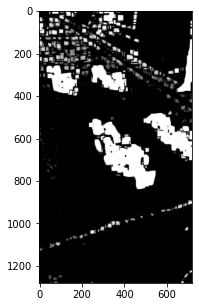

In [596]:
image10 =cv2.subtract(image9,blur)
plt.figure(figsize=(ax, ay))
plt.imshow(image10, cmap="gray")
plt.show()

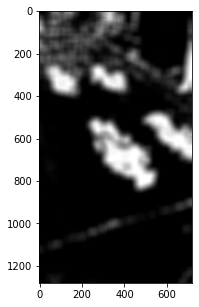

In [603]:
blur2 = cv2.GaussianBlur(image10, (45,45), 20)
plt.figure(figsize=(ax, ay))
plt.imshow(blur2, cmap="gray")
plt.show()